# Latar Belakang

Tranjakarta adalah sebuah perusahaan yang bergerak dibidang jasa transportasi publik,perusahaan ini ingin meningkatkan tingkat pelayanan yang baik kepada pengguna tranjakarta, namun tantangannya masih banyak yang harus dibenahi terutama, tingkat padatnya penumpang transjakarta yang meningkat imbas dari pesatnya pertumbuhan penduduk kota jakarta dan sekitarnya.   





# Rumusan Masalah 

Perusahaan Transjakrta ini ingin mengetahui bagaimana tingkat kepadatan yang ada di Halte dan Corridor yang tersebar di seluruh kota jakarta dan kota sekitarnya, guna informasi ini untuk mengetahui daerah mana saja yang memiliki kepadatan tertinggi dan terendah, dengan mengetahui ini perushaan bisa memutuskan berbagai strategi unutk menanggulangi permasalahan ini dan akan berimplikasi pada tikat kenyamanan publi transportasi, sehingga jika ini tercapai akan bisa meningkatkan jummlah penduduk jakarta untuk dapat menggunakan trasportasi publik.


Bagaimana mengatasi masalah kapasitas dan kepadatan penumpang pada beberapa rute dan selama jam-jam sibuk, dengan melihat hubungannya terhadap beberapa parameter yang terkait?









# Data
Berikut adalah data yang terkumpul dari Database perusahaan yang akan digunakan untuk menjawab masalah yang ada diatas.

In [381]:
import numpy as np
import pandas as pd
import warnings
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import anderson
import pandas as pd
from sklearn.ensemble import IsolationForest



pd.set_option('display.float_format', lambda x: '%.3f' % x)

Dataset ini berisi terkait penumpang Transjakrta, dari alur penumpanng, nama corridor transjakart,halte dan juga waktu dimana pengguna transjarta menggunakan trasportasi Transjakarta, dataset ini terdapat 12 kolom yaitu:


- transID: Unique transaction id for every transaction
- payCardID: Customers main identifier. The card customers use as a  
  ticket for entrance and exit.
- payCardBank: Customers card bank issuer name
- payCardName: Customers name that is embedded in the card.
- payCardSex: Customers sex that is embedded in the card
- payCardBirthDate: Customers birth year
- corridorID: Corridor ID / Route ID as key for route grouping.
- corridorName: Corridor Name / Route Name contains Start and Finish 
  for each route.
- direction: 0 for Go, 1 for Back. Direction of the route.
- tapInStops: Tap In (entrance) Stops ID for identifying stops name
- tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
- tapInStopsLat: Latitude of Tap In Stops
- tapInStopsLon: Longitude of Tap In Stops
- stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related - direction.
- tapInTime: Time of tap in. Date and time
- tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
- tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
- tapOutStopsLat: Latitude of Tap Out Stops
- tapOutStopsLon: Longitude of Tap Out Stops
- stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related 
  to direction.
- tapOutTime: Time of tap out. Date and time
- payAmount: The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.csv


In [382]:
df1=pd.read_csv('Transjakarta.csv')
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [383]:
df1.tail(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.000,P00261,...,106.823,2,2023-04-21 18:18:37,P00228,SMK 57,-6.291,106.824,13.000,2023-04-21 19:55:49,3500.000
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.000,P00064,...,106.881,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291,106.886,2.000,2023-04-18 22:28:22,3500.000
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.000,B02873P,...,106.817,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370,106.896,14.000,2023-04-04 13:27:25,20000.000
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.000,B02505P,...,106.810,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.189,106.811,34.000,2023-04-15 20:27:50,0.000
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.000,P00001,...,106.748,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238,106.778,7.000,2023-04-12 21:34:53,3500.000


# Pemahaman dan Pembersihan Data
Sebelum melangkah ke analisis, penting bagi kita untuk lebih memahami dataset pada tahap pemahaman data. Dari proses ini, kita dapat mengidentifikasi berbagai anomali yang mungkin ada dalam dataset kita, yang perlu diatasi selama tahap pembersihan data. Setiap tindakan penanganan anomali akan dijelaskan dengan alasan yang didasarkan pada pengetahuan domain maupun analisis statistik.

In [384]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [385]:
display(df1.describe(), df1.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,37900.000,37900.000,37900.000,37900.000,37900.000,37900.000,36556.000,36556.000,36556.000,36893.000
mean,425006029854231744.000,1990.089,0.501,-6.215,106.842,13.572,-6.215,106.841,21.220,2699.713
std,1321698663895496704.000,13.051,0.500,0.058,0.060,12.238,0.059,0.061,13.801,4212.226
min,60403675436.000,1946.000,0.000,-6.395,106.615,0.000,-6.395,106.615,1.000,0.000
25%,180044239953466.000,1982.000,0.000,-6.246,106.803,4.000,-6.247,106.802,11.000,0.000
50%,3507946556271373.000,1990.000,1.000,-6.215,106.835,10.000,-6.215,106.835,18.000,3500.000
75%,4699023220672919.000,2001.000,1.000,-6.176,106.882,19.000,-6.175,106.883,29.000,3500.000
max,4997693930906134528.000,2012.000,1.000,-6.089,107.024,68.000,-6.092,107.024,77.000,20000.000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [386]:
pd.set_option('display.max_colwidth', 1)

list_Item = []
for col in df1.columns :
    list_Item.append ([col, df1[col].nunique(), df1[col].unique()])
    
tabl_1_Desc = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Sample'], 
                         data=list_Item)
tabl_1_Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
-  kita bisa melihat bahwa dataset Transjakarta memiliki 37900 baris dan 22 kolom 











# Missing Value

In [387]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         3.317
corridorName       5.092
direction          0.000
tapInStops         3.201
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        6.040
tapOutStopsName    3.546
tapOutStopsLat     3.546
tapOutStopsLon     3.546
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

<Axes: >

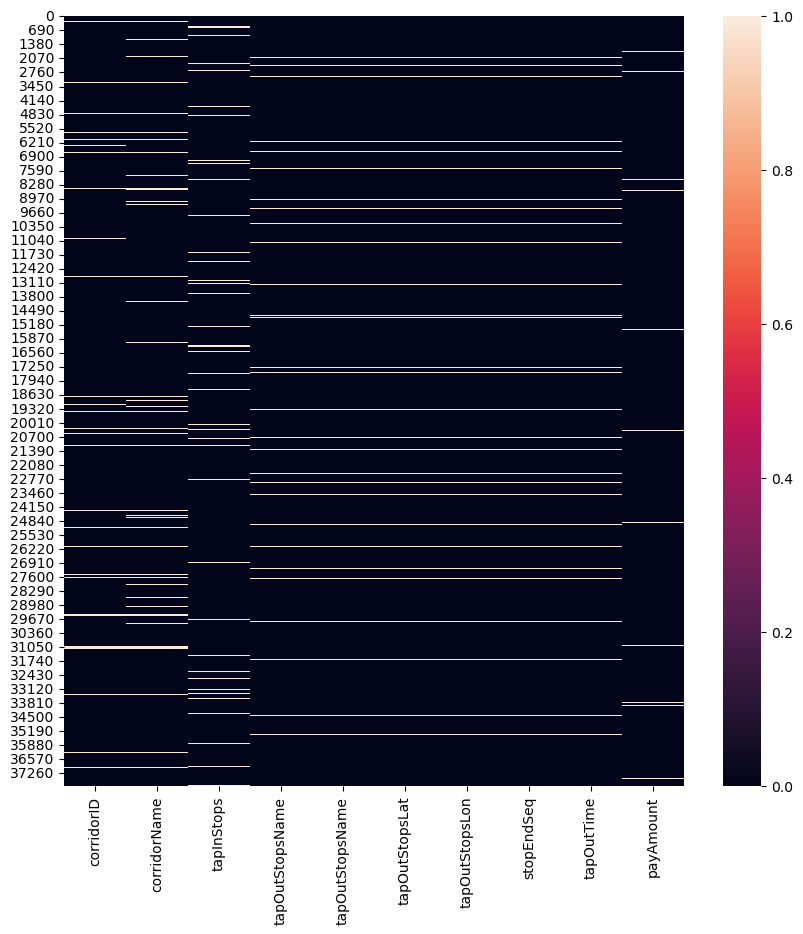

In [388]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[['corridorID','corridorName','tapInStops','tapOutStopsName','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Secara garis besar:
missing value di kolom corridorID,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime memiliki proporsi yang cukup tinggi (<4%) dan corridorName (>5%) 

Ada 2 cara untuk menangani missing value:

   Untuk mengatasi missing value pada variabel kategorikal string, beberapa pendekatan yang dapat dipertimbangkan antara lain:

- Mode (modus): Mengisi missing value dengan nilai yang paling sering muncul (modus) dalam variabel tersebut.

- Kategori "Lainnya" atau "Missing": Mengganti missing value dengan kategori seperti "Lainnya" atau "Missing" agar tetap dapat mempertahankan informasi bahwa data tersebut sebelumnya hilang.

- Pengisian Berdasarkan Distribusi: Menggunakan distribusi proporsi kategori untuk mengisikan nilai missing, terutama jika distribusi tidak merata.



In [389]:
df1['corridorID'].value_counts().head(110)
#median = df1.groupby('corridorID').value_counts().median()
#median
#df1.groupby(['corridorName']).describe(include='object')['corridorID']['top']
#display(df1[df1['corridorName'].isna()]['direction'].value_counts(),
#df1[df1['corridorID'].isna()]['direction'].value_counts())

corridorID
1T         400
S21        388
JIS3       341
8C         339
JAK.06     333
          ... 
10D        164
11M        161
1K         160
6T         160
JAK.48B    159
Name: count, Length: 110, dtype: int64

Untuk mengatasi missing value pada variabel kategorikal string, beberapa pendekatan yang dapat dipertimbangkan antara lain:

- Mode (modus): Mengisi missing value dengan nilai yang paling sering muncul (modus) dalam variabel tersebut.

- Kategori "Lainnya" atau "Missing": Mengganti missing value dengan kategori seperti "Lainnya" atau "Missing" agar   tetap dapat mempertahankan informasi bahwa data tersebut sebelumnya hilang.

- Pengisian Berdasarkan Distribusi: Menggunakan distribusi proporsi kategori untuk mengisikan nilai missing, 
  terutama jika distribusi tidak merata,
  
maka pada kasus data ini diambil cara dengan kategori "Lainnya" yaitu mengganti ,missing value dengan kategori lainnya,agar tetap dapat mempertahankan informasi bahwa data tersebut yang sebelumnya hilang.

pada data corridorName yang hilang akan di isi dengan data tapinstopName, ini dipertimbangkan karena data dalam kolum tapinStop name tidak ada missing value dan memiliki nilai kedekatan pada data corridor name, karena tapstopName adalah nama halte Transjakarta, tentu ini mewakili nama corridorName dan menjadi pertimbangan untuk  diisikan ke data corridorName.


In [390]:
df1['corridorName'].fillna(df1['tapInStopsName'].astype(str), inplace=True)
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [391]:
df1[['corridorID','corridorName']].isna().sum()

corridorID      1257
corridorName    0   
dtype: int64

setalah melakukan pengisian data kosong di columns corridorName maka data kosong menjadi 0, dan tersisia data kosong di columns corridorID yang berjumlah 1257 data yang kosong, dari sini kita lihat corridorName sangat berkaitan dan menjadi faktor yang berkesinambungan, maka dengan kesimpulan ini kita bisa mengisi data corridorName di data kosong di Kolom corridorID, karena data itu sangat berdekatan dan berkaitan. 

In [392]:
df1['corridorID'].fillna(df1['corridorName'].astype(str), inplace=True)
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [393]:
df1[['corridorID','corridorName']].isna().sum()

corridorID      0
corridorName    0
dtype: int64

setelah melakukan pengisian data corridorID dan corridorName sudah telah tidak didapati data yang kosong di data corridorID dan corridorName. 

In [394]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         3.201
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        6.040
tapOutStopsName    3.546
tapOutStopsLat     3.546
tapOutStopsLon     3.546
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

kemudian pada data tapInStop masih memiliki data kosng didalamnya sebanyak 3.2%, untuk menangani ini kita dapat memilih strategi untuk mengisi data kosong dengan data yang lain yang memiliki keterkaitan yang tinggi, untuk data tapInStop memiliki keterkaitan dengan tapInStopName, dengan data tapInStopName tidak memiliki data kosong, maka dengan kesimpulan ini kita memutuskan untuk mengisi data kosong tapInStop dengan data tapInStopName.  

In [395]:
df1['tapInStops'].fillna(df1['tapInStopsName'].astype(str), inplace=True)
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [396]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         0.000
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        6.040
tapOutStopsName    3.546
tapOutStopsLat     3.546
tapOutStopsLon     3.546
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

In [397]:
data_tap = df1['tapOutStops'].value_counts()
data_tap

tapOutStops
P00016     306
P00170     255
B05725P    189
P00137     161
B05708P    158
          ... 
B00937P    1  
B01078P    1  
B04418P    1  
B03190P    1  
B03207P    1  
Name: count, Length: 2230, dtype: int64

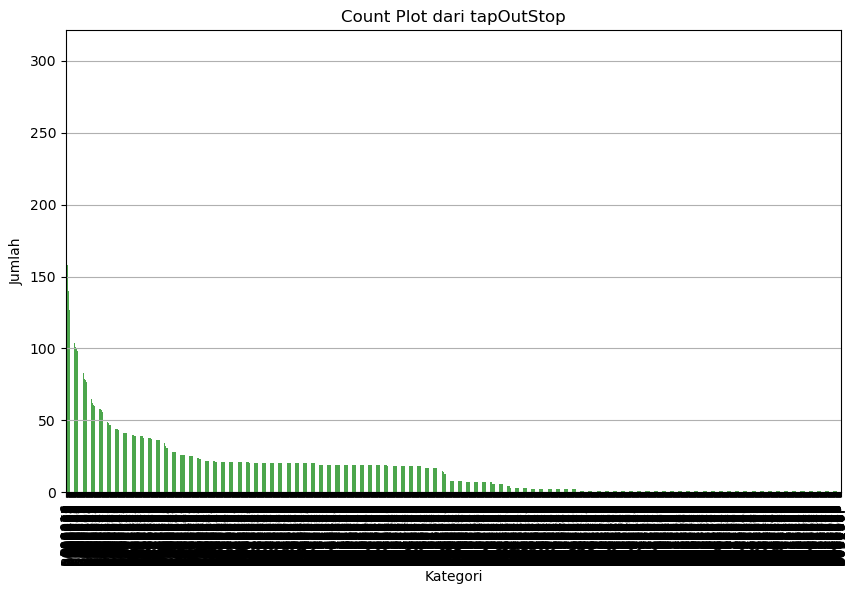

In [398]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan df1 adalah DataFrame Anda
# Mengekstrak kolom 'kategori' (data categorical)
data_categorical = df1['tapOutStops']

# Membuat histogram (count plot) menggunakan matplotlib
plt.figure(figsize=(10, 6))
data_categorical.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Count Plot dari tapOutStop')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()


kemudian dari data selanjutnya masih ada beberapa data yang masih memiliki data kosong diataranya data tapOutStop,tapOutStopName,tapOutStopLat,tapOutStopLon,stopEndSeq,tapOutTime,payAmount, kemudian data tapOutStop dan tapOutName memiliki hubungan yang erat tetapai kedua data ini memiliki data kosong dan tapOutStop meiliki data kosong yang lebih banyak dari tapOutStopName, tapOutStop memiliki 6% dan tapOutStopName 3,5%,tapOutStopLat 3.5%,tapOutStopsLon 3,5% keempatnya memiliki data kosong dan tak ada data yang berkaitan yang bisa disikan maka pada kasus ini kita menggunakan tekhnik pengisian data kosong dengan tehnik pengisian data kosong dengan proporsi distribusi frekuensi, dan kenapa tidak menggunakan pendekatan modus, karena pendekatan modus tidak bisa digunakan jika data mempunyai sidat skew kanan ataupun kiri karena data akan berkumpul pada satu titik saja.

In [400]:
tapOutStops_name_distribution = df1['tapOutStopsName'].value_counts(normalize=True)
missing_name_indices = df1['tapOutStopsName'].isnull()
df1.loc[missing_name_indices, 'tapOutStopsName'] = np.random.choice(tapOutStops_name_distribution.index, 
                                                                 size=missing_name_indices.sum(), 
                                                                 p=tapOutStops_name_distribution.values)

tapOutStops_distribution = df1['tapOutStops'].value_counts(normalize=True)
missing_indices = df1['tapOutStops'].isnull()
df1.loc[missing_indices, 'tapOutStops'] = np.random.choice(tapOutStops_distribution.index, 
                                                       size=missing_indices.sum(), 
                                                       p=tapOutStops_distribution.values)

tapOutStops_distribution_Lat = df1['tapOutStopsLat'].value_counts(normalize=True)
missing_indices = df1['tapOutStopsLat'].isnull()
df1.loc[missing_indices, 'tapOutStopsLat'] = np.random.choice(tapOutStops_distribution_Lat.index, 
                                                       size=missing_indices.sum(), 
                                                       p=tapOutStops_distribution_Lat.values)

tapOutStops_distribution_Lon = df1['tapOutStopsLon'].value_counts(normalize=True)
missing_indices = df1['tapOutStopsLon'].isnull()
df1.loc[missing_indices, 'tapOutStopsLon'] = np.random.choice(tapOutStops_distribution_Lon.index, 
                                                       size=missing_indices.sum(), 
                                                       p=tapOutStops_distribution_Lon.values)

print("\nDataFrame setelah Pengisian Missing dengan Distribusi Proporsi:")
df1.head(5)



DataFrame setelah Pengisian Missing dengan Distribusi Proporsi:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [401]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         0.000
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        0.000
tapOutStopsName    0.000
tapOutStopsLat     0.000
tapOutStopsLon     0.000
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

setelah melakukan pengisian data kosong di data tapOutStops dan tapOutStopName maka masi tersisa 3 data kosong lagi 
yaitu stopEndSeq,tapOutTime,payAmount. selanjutnya kita akan membersihkan data tapOutTime untuk itu kita harus melihat karateristik data tersebut.

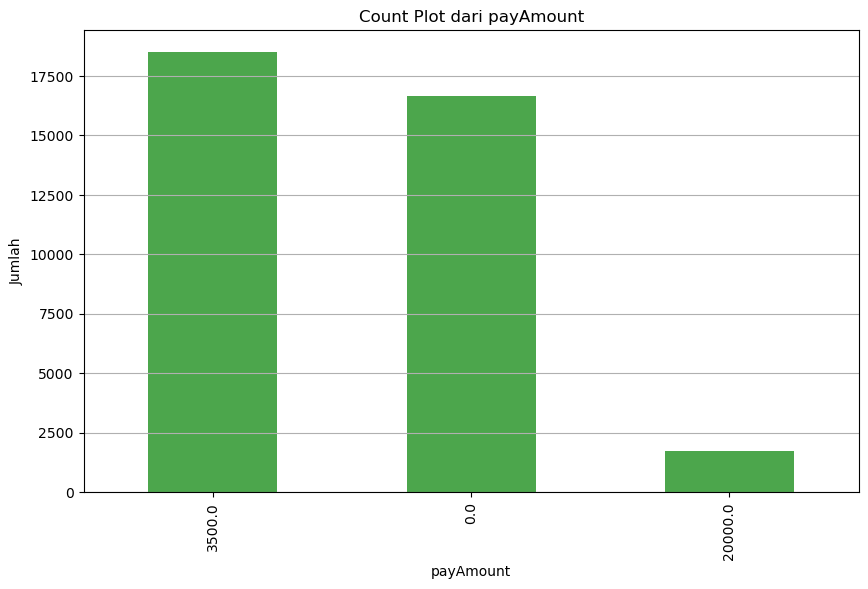

In [402]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan df1 adalah DataFrame Anda
# Mengekstrak kolom 'kategori' (data categorical)
data_categorical = df1['payAmount']

# Membuat histogram (count plot) menggunakan matplotlib
plt.figure(figsize=(10, 6))
data_categorical.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Count Plot dari payAmount')
plt.xlabel('payAmount')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()


karena nilai 3500 dan nilai 0 cukup tinggi maka kita harus mengecek apakah nilai 0 itu termasuk kedalam nilai yang harus dipertahankan atau dijadikan data missing,dengan melihat tingginya nilai 0 di dalam histogram membuat prediksi amat tidak mungkin bahwa 0 disini ada data yang valid, dan dengan melihat modusnya terlihat modus dari data payAmount ini adalah 3500, maka kita bisa memutuskan untuk mengisi data 0 dengan pendekatan modus menjadi nilai 3500. 

In [403]:
df1[['payAmount']].mode()

,payAmount
0,3500.000


In [404]:
df1.loc[df1['payAmount']==0.0,'payAmount']=3500

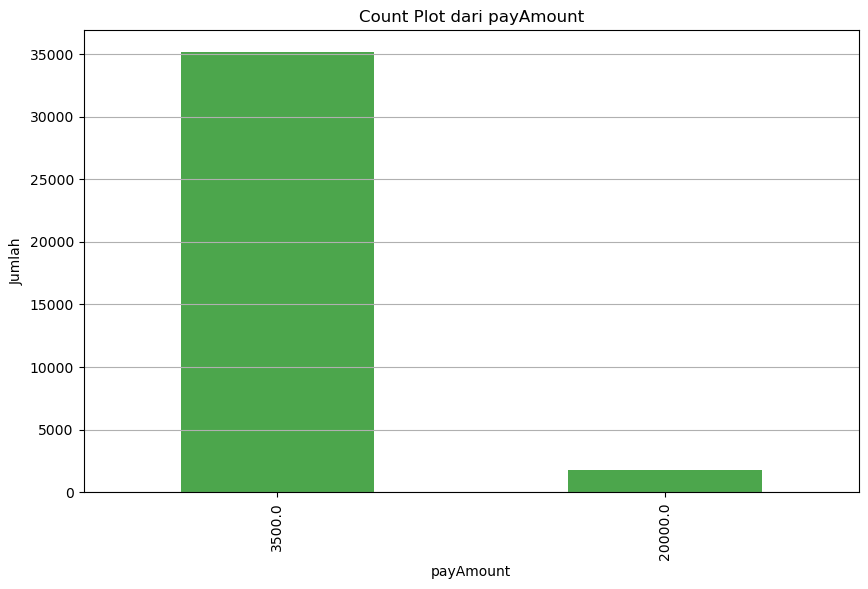

In [405]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan df1 adalah DataFrame Anda
# Mengekstrak kolom 'kategori' (data categorical)
data_categorical = df1['payAmount']

# Membuat histogram (count plot) menggunakan matplotlib
plt.figure(figsize=(10, 6))
data_categorical.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Count Plot dari payAmount')
plt.xlabel('payAmount')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()

setelah mengisi data 0 mendaji nilai 3500 maka terlihat data 0 sudah tidak ada lagi lalu kita akan mengisikan data missing value yang masi ada di data payAmount, pada pengisian missing value ini juga kita memutuskan untuk mengisinya dengan pendekatan modus, dikarenakan perbandingan data hanya tinggal dua variabel saja yaitu data dengan nilai 3500 dan data 20000,dan bisa dipastikan nilai modus dan nilai mediannya adalah 3500

In [28]:
df1[['payAmount']].mode()

,payAmount
0,3500.000


In [406]:
df1[['payAmount']].median()

payAmount   3500.000
dtype: float64

In [407]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         0.000
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        0.000
tapOutStopsName    0.000
tapOutStopsLat     0.000
tapOutStopsLon     0.000
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

In [408]:
# Menghitung modus dari kolom 'Value'
mode_value = df1['payAmount'].mode()[0]
# Menggantikan nilai missing value dengan modus
df1['payAmount'].fillna(mode_value, inplace=True)

In [409]:
tapOutTime_distribution = df1['tapOutTime'].value_counts(normalize=True)
missing_name_indices = df1['tapOutTime'].isnull()
df1.loc[missing_name_indices, 'tapOutTime'] = np.random.choice(tapOutTime_distribution.index, 
                                                                 size=missing_name_indices.sum(), 
                                                                 p=tapOutTime_distribution.values)

In [410]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         0.000
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        0.000
tapOutStopsName    0.000
tapOutStopsLat     0.000
tapOutStopsLon     0.000
stopEndSeq         3.546
tapOutTime         0.000
payAmount          0.000
dtype: float64

In [411]:
seq = df1[['stopEndSeq','direction']]
seq.value_counts()

stopEndSeq  direction
12.000      0.000        897
15.000      1.000        780
16.000      1.000        684
6.000       0.000        664
14.000      0.000        657
                        ... 
68.000      1.000        1  
69.000      0.000        1  
71.000      1.000        1  
72.000      1.000        1  
77.000      1.000        1  
Name: count, Length: 142, dtype: int64

In [412]:
seq.mode()

,stopEndSeq,direction
0,12.000,1.000


In [413]:
seq.median()

stopEndSeq   18.000
direction    1.000 
dtype: float64

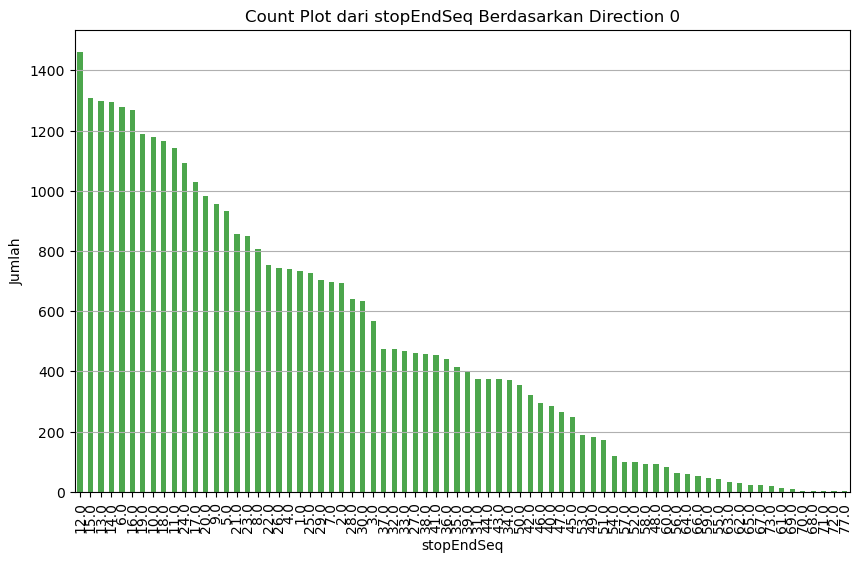

In [414]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan df1 adalah DataFrame Anda
# Mengekstrak kolom 'kategori' (data categorical)
data_categorical = seq['stopEndSeq']

# Membuat histogram (count plot) menggunakan matplotlib
plt.figure(figsize=(10, 6))
data_categorical.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Count Plot dari stopEndSeq Berdasarkan Direction 0')
plt.xlabel('stopEndSeq')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()

In [415]:
# Menghitung median dari kolom 'Value'
median_value = df1['stopEndSeq'].median()

# Menggantikan nilai missing value dengan median
df1['stopEndSeq'].fillna(median_value, inplace=True)

In [416]:
seq.isna().sum()/seq.shape[0]*100

stopEndSeq   3.546
direction    0.000
dtype: float64

# Data Yang Sudah Bersih 

In [417]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         0.000
corridorName       0.000
direction          0.000
tapInStops         0.000
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        0.000
tapOutStopsName    0.000
tapOutStopsLat     0.000
tapOutStopsLon     0.000
stopEndSeq         0.000
tapOutTime         0.000
payAmount          0.000
dtype: float64

In [41]:
df1.to_csv('data_clean_tranjakarta.csv', index=False)

# Sekilas Data Yang Sduah Dibersihkan 

In [418]:
listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, df1[col].isna().sum(),
                    df1[col].nunique(), list(df1[col].drop_duplicates().sample(2).values)]);

df1Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df1.shape)
df1Desc

(37900, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37900,"[TILY614X4M37QM, QCVA883M2Y07EI]"
1,payCardID,int64,0,2000,"[3585765705663958, 5498307685938018]"
2,payCardBank,object,0,6,"[online, emoney]"
3,payCardName,object,0,1993,"[Saka Pradipta, R. Sakura Usada]"
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,67,"[2007, 1967]"
6,corridorID,object,0,1040,"[5B, JAK.30]"
7,corridorName,object,0,1212,"[Taman Kota - Budi Luhur, RS PIK 2]"
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,3333,"[B02082P, B02538P]"


# Data Analisis

Pada data analisis ini kita ingin mengetahui sebaran penumpang tranjakarta dari setiap halte - halte transjakarta dan juga dari corridor - corridor transjakarta, dari variabel ini diharapkan nantinya kita dapat mengetahui dimana saja persebaran penumpang transjarata dan juga mengetahui seberapa banyak penumpang transjakarta yang berada di setiap halte - halte dan juga corridor transjakarta. setelah mengetahui sebaran penumpang transjakarta kita dapat melihat dimana saja sebaran penumpang terpadat dan dimana saja daerah dengan sedikit penumpang di halte - halte dan corridor transjakarta. setelah itu kita juga akan melihat sebaran penumpang transjakarta berdasarkan sebaran waktunya, dengan mengetahui ini semua nantinya kita akan bisa menyesuaikan armada transjakarta pada setiap halte,corridor dan waktu yang terpadat agar penumpang dapat terlayani dengan baik dan tidak berdesak desakan, untuk itu kita akan memulai analisis dengan data disetiap halte,corridor dan juga di setiap waktu trafic transjakarta.

In [234]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

# Pada analisis yang pertama kita menganalisis sebaran penumpang transjakarta di setiap halte Tap in dengan kode direction 0 atau direction GO.

In [419]:
halte = df1[df1['direction']==0.000][['tapInStops','tapInStopsName','tapInStopsLat','tapInStopsLon']]
halte.head(5)

,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon
1,B01963P,Kemenkes 2,-6.229,106.833
2,B00499P,Gg. Kunir II,-6.133,106.814
3,B05587P,Taman Elok 1,-6.196,106.935
4,P00239,Sunter Boulevard Barat,-6.150,106.889
5,B00127P,Benhil 3,-6.216,106.816


In [420]:
halte_value = df1[df1['direction']==0.000][['tapInStops','tapInStopsName']]
x_0 = halte_value.value_counts()
x_0

tapInStops                     tapInStopsName                     
B00248P                        Cibubur Junction                       130
B03277P                        Rusun Kapuk Muara                      122
P00064                         Garuda Taman Mini                      117
P00033                         Cawang UKI                             89 
P00202                         Rawa Selatan                           87 
                                                                      .. 
B04928P                        Simpang Kemang Utara Timur             1  
Al Izhar Pondok Labu 2         Al Izhar Pondok Labu 2                 1  
B04942P                        Simpang KH Abdulloh Karang Tengah 1    1  
B04951P                        Simpang Kopi Roa Malaka                1  
Yon Arhanud - 10 Pesanggrahan  Yon Arhanud - 10 Pesanggrahan          1  
Name: count, Length: 1895, dtype: int64

In [421]:
result = halte_value.value_counts().reset_index(name='count')
result

,tapInStops,tapInStopsName,count
0,B00248P,Cibubur Junction,130
1,B03277P,Rusun Kapuk Muara,122
2,P00064,Garuda Taman Mini,117
3,P00033,Cawang UKI,89
4,P00202,Rawa Selatan,87
...,...,...,...
1890,B04928P,Simpang Kemang Utara Timur,1
1891,Al Izhar Pondok Labu 2,Al Izhar Pondok Labu 2,1
1892,B04942P,Simpang KH Abdulloh Karang Tengah 1,1
1893,B04951P,Simpang Kopi Roa Malaka,1


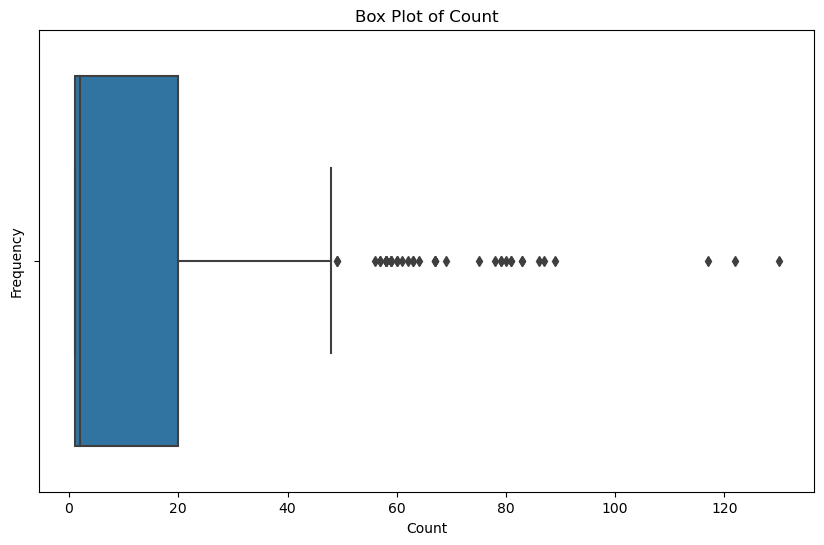

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gambar diagram box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='count', data=result)

# Atur label dan judul diagram
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Box Plot of Count')

# Tampilkan diagram box plot
plt.show()


Pada data ini kita mencurigai terdapat suatu anomali atau oulier dari sebuah data ini terlihat dari data box plot tersebut dengan mempunyak ekor yang panjang ke kanan, oleh karena itu kita ingin mengujinya dengan pengujian z score.

In [423]:
# Hitung rata-rata dan deviasi standar
mean_value = df_tap_out['count'].mean()
std_dev = df_tap_out['count'].std()

# Hitung Z-Score untuk setiap nilai
df_tap_out['Z_Score'] = (df_tap_out['count'] - mean_value) / std_dev

# Tampilkan DataFrame dengan Z-Score
df_tap_out


,index,count,Z_Score
0,0,130,8.520
1,1,122,7.952
2,2,117,7.597
3,3,89,5.610
4,4,87,5.468
...,...,...,...
1890,1890,1,-0.638
1891,1891,1,-0.638
1892,1892,1,-0.638
1893,1893,1,-0.638


setalah pengujian z score, nilai 1 sampai 16 di identifikasi sebagai outlier, karena dalam penilaian z score nilai yang dibawah mean di identifikasi sebagai outlier. lalu kita memilih utuk tidak membuang data outlier namun mengganti nya dengan nilai mean.

In [424]:
result

,tapInStops,tapInStopsName,count
0,B00248P,Cibubur Junction,130
1,B03277P,Rusun Kapuk Muara,122
2,P00064,Garuda Taman Mini,117
3,P00033,Cawang UKI,89
4,P00202,Rawa Selatan,87
...,...,...,...
1890,B04928P,Simpang Kemang Utara Timur,1
1891,Al Izhar Pondok Labu 2,Al Izhar Pondok Labu 2,1
1892,B04942P,Simpang KH Abdulloh Karang Tengah 1,1
1893,B04951P,Simpang Kopi Roa Malaka,1


In [425]:
#result_0_sampel = result_filtered['count']
result_0_sampel.mean()

17.12784090909091

In [426]:
result['count'] = result['count'].replace(range(8, 6), 21)
result.head(5)

,tapInStops,tapInStopsName,count
0,B00248P,Cibubur Junction,130
1,B03277P,Rusun Kapuk Muara,122
2,P00064,Garuda Taman Mini,117
3,P00033,Cawang UKI,89
4,P00202,Rawa Selatan,87


In [427]:
result['count'] = result['count'].replace(range(1,8),18)
result.head(5)

,tapInStops,tapInStopsName,count
0,B00248P,Cibubur Junction,130
1,B03277P,Rusun Kapuk Muara,122
2,P00064,Garuda Taman Mini,117
3,P00033,Cawang UKI,89
4,P00202,Rawa Selatan,87


In [428]:
result['count'] = result['count'].replace(range(8, 16),18)
result.head(5)

,tapInStops,tapInStopsName,count
0,B00248P,Cibubur Junction,130
1,B03277P,Rusun Kapuk Muara,122
2,P00064,Garuda Taman Mini,117
3,P00033,Cawang UKI,89
4,P00202,Rawa Selatan,87


Pada proses ini penanganan data yang dinilai oleh pengujian z score adalah outlier, maka data itu akan deganti dengan nilai mean atau diatas nilai mean 

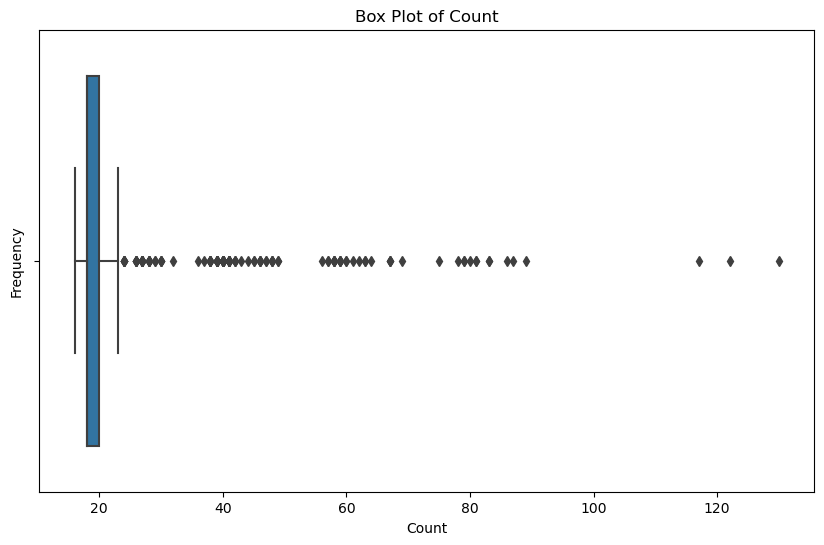

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gambar diagram box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='count', data=result)

# Atur label dan judul diagram
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Box Plot of Count')

# Tampilkan diagram box plot
plt.show()


setela melakukan uji score kita mengganti nilai outlier dengan nilai mean 

In [430]:
halte_result_go = result.join(halte.set_index('tapInStops'), 
                             on='tapInStops', rsuffix='_halte_direction_1').drop_duplicates()
halte_result_go

display(halte_result_go.describe(), halte_result_go.describe(include='object'))

,count,tapInStopsLat,tapInStopsLon
count,1895.000,1895.000,1895.000
mean,20.621,-6.214,106.844
std,9.089,0.060,0.062
min,16.000,-6.387,106.618
25%,18.000,-6.250,106.804
50%,18.000,-6.215,106.842
75%,20.000,-6.174,106.888
max,130.000,-6.089,107.024


,tapInStops,tapInStopsName,tapInStopsName_halte_direction_1
count,1895,1895,1895
unique,1895,1499,1499
top,B00248P,Cibubur Junction,Cibubur Junction
freq,1,2,2


In [431]:
halte_result_go.head(5)
#halte_result_go.to_csv('halte_result_go.csv', index=False)

,tapInStops,tapInStopsName,count,tapInStopsName_halte_direction_1,tapInStopsLat,tapInStopsLon
0,B00248P,Cibubur Junction,130,Cibubur Junction,-6.369,106.894
1,B03277P,Rusun Kapuk Muara,122,Rusun Kapuk Muara,-6.136,106.763
2,P00064,Garuda Taman Mini,117,Garuda Taman Mini,-6.290,106.881
3,P00033,Cawang UKI,89,Cawang UKI,-6.250,106.874
4,P00202,Rawa Selatan,87,Rawa Selatan,-6.174,106.858


pada penjelasan data ini diketahui cibubur junction adalah halte terpadat dari transjakarta dengan kode direction 0 dengan berjumlah 170 penumpang lalu disusul Rusun Kapuk Muara yang berjumlah 122 penumpang, dan Garuda Taman Muara dengan berjumlah 117 penumpang.

In [432]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_1 = folium.Map(location=[halte['tapInStopsLat'].iloc[0], halte['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result_go['count'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result_go.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['count'] / max_count
    
    # Jika jumlah penumpang lebih besar dari 40, tambahkan marker
    if row['count'] > 60:
        # Menghitung warna berdasarkan tingkat kepadatan
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
        # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapInStopsLat'], row['tapInStopsLon']],
            radius=7,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapInStopsName_halte_direction_1']}\nJumlah Penumpang: {row['count']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap_1)

# Menampilkan peta
mymap_1


Pada diagram maps ini terlihat bahwa sebaran penumpang transjakarta dengan kode arah 0 atau arah GO terkonsentrasi di wilayah tengan jakarta dan selatan jakarta dari data mpans ini kita buat titik yang lebih dari 60 penumpang dan semakin terang warnanya semakin banyak jumlah penumpang did ttik halte tersebut, Tetapi halte halte di bagian selatan dan utara jakarta memiliki jumlah penumpang tertinggi yang bagian selata berada di halte Cibubur Junction dan bagian utara di kalpuk muara yang berjumlah 122 penumpang, ini bisa di pertimbangkan bagi pengelola Transjakarta untuk mempertimbangkan berbagai strategi agar efektig dalam pelaksanaanya.

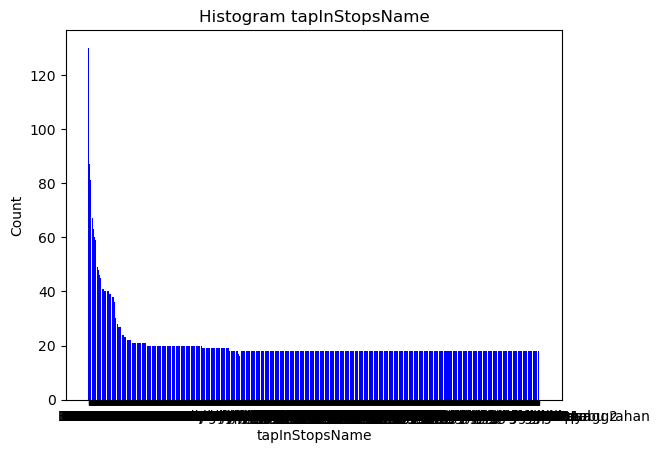

In [433]:
plt.bar(result['tapInStops'], result['count'], color='blue')
plt.xlabel('tapInStopsName')
plt.ylabel('Count')
plt.title('Histogram tapInStopsName')
plt.show()

In [434]:
jumlah_penumpang = halte_result_go['count']

In [435]:
from scipy.stats import anderson
# Anderson-Darling Tes
anderson_statistic, anderson_critical_values, anderson_significance_level = anderson(jumlah_penumpang, dist='norm')

# Tampilkan hasil
print(f"Anderson Statistic: {anderson_statistic}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Level: {anderson_significance_level}")

# Keputusan
alpha = 0.05
if anderson_statistic > anderson_critical_values[2]:
    print("Tolak hipotesis nol: Data tidak berasal dari distribusi normal.")
else:
    print("Terima hipotesis nol: Data berasal dari distribusi normal.")


Anderson Statistic: 493.56227557738293
Critical Values: [0.575 0.655 0.785 0.916 1.09 ]
Significance Level: [15.  10.   5.   2.5  1. ]
Tolak hipotesis nol: Data tidak berasal dari distribusi normal.


Pada diagram histogram jumlah penumpang taransjakata ini terlihat diagram histogram terlihat menunjukan skew ke kiri, ini berarti data persebaran penumpang transjakarta tidak terdistribusi secara normal dan data tersebut juga telah dilakukan pengujian dengan uji Liliefors dan hasilnya hipotesis H0 ditolak yang berarti data tidak berasal dari distribusi normal,dengan tidak terdistribusi secara normal sebaran penumpang transjakarta terlihat terkonsentrasi pada daerah tertentu saja. lalu jika kita lihat anata nilai max dan min mempunyai selisih yang sangat tinggi ini akan berpengaruh dalam tingkat distribusi, dengan tidak terditribusi normalnya data penumpang transjakarta ini bisa menjadi penumpukan jumlah penumpang di beberapa titik saja yang bisa membuat kepadatan dan kemacetan di daerah tersebut, dan ini adalah salah satu parameter transjakarta untuk meningkatkan tikangkat pelayanannya. 

Pada diagram box plot juga terlhat diagram mempunya buntut ke kanan yang sangat panjang ini bisa juga menunjukab bahwa data perseberan penumpang di setiap haltenya tidak terdistribusi tidak normal, dan juga ini terlihat banyak sekali outlier yang ada dalam perserbaran penumpang di transjakarta, ini menyebabkan data yang jumlah tinggi hanya tersebar pada satu tititk saja.

# Pada analisis yang pertama kita menganalisis sebaran penumpang transjakarta di setiap halte Tap In dengan kode direction 1 atau direction Back.

In [436]:
halte_direction_1 = df1[df1['direction']==1.000][['tapInStops','tapInStopsName','tapInStopsLat','tapInStopsLon']]
halte_direction_1

,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon
0,P00142,Pal Putih,-6.185,106.844
7,B03416P,SDN Pondok Labu 11,-6.313,106.802
8,B00795P,Imperium,-6.210,106.831
10,B05433P,Pegangsaan Timur,-6.199,106.842
11,P00254,Tendean,-6.240,106.831
...,...,...,...,...
37892,B01087P,Jln. Gunung Galunggung 1,-6.142,106.737
37895,P00261,Tosari,-6.197,106.823
37896,P00064,Garuda Taman Mini,-6.290,106.881
37897,B02873P,Plaza Sentral,-6.216,106.817


In [437]:
halte_value_direction_1 = df1[df1['direction']==1.000][['tapInStops','tapInStopsName']]
x_1 = halte_value_direction_1.value_counts()
x_1

tapInStops                tapInStopsName               
P00170                    Penjaringan                      189
P00016                    BKN                              146
P00297                    BNN LRT                          143
P00164                    Pejaten                          124
P00254                    Tendean                          115
                                                          ... 
B04633P                   Sekolah Islam PB Soedirman       1  
B04641P                   Sekolah Muhammadiyah Grogol      1  
B04647P                   Sekolah Penabur Gunung Sahari    1  
B04672P                   Semar                            1  
Yayasan Adi Luhur Gedong  Yayasan Adi Luhur Gedong         1  
Name: count, Length: 1903, dtype: int64

In [438]:
result_1 = halte_value_direction_1.value_counts().reset_index(name='count')
x = result_1.rename(columns={'count': 'JumlahPenumpanghalte'})
x.tail(900)

,tapInStops,tapInStopsName,JumlahPenumpanghalte
1003,P00213,Salemba Carolus,2
1004,P00055,Enggano,2
1005,B02808P,Perumahan KFT 1,2
1006,Imigrasi Jakarta Timur,Imigrasi Jakarta Timur,2
1007,B00903P,Jln. Batang Hari Cideng Barat,2
...,...,...,...
1898,B04633P,Sekolah Islam PB Soedirman,1
1899,B04641P,Sekolah Muhammadiyah Grogol,1
1900,B04647P,Sekolah Penabur Gunung Sahari,1
1901,B04672P,Semar,1


In [439]:
halte_result = x.join(halte_direction_1.set_index('tapInStops'), 
                             on='tapInStops', rsuffix='_halte_direction_1').drop_duplicates()
halte_result



,tapInStops,tapInStopsName,JumlahPenumpanghalte,tapInStopsName_halte_direction_1,tapInStopsLat,tapInStopsLon
0,P00170,Penjaringan,189,Penjaringan,-6.126,106.792
1,P00016,BKN,146,BKN,-6.258,106.870
2,P00297,BNN LRT,143,BNN LRT,-6.246,106.871
3,P00164,Pejaten,124,Pejaten,-6.278,106.830
4,P00254,Tendean,115,Tendean,-6.240,106.831
...,...,...,...,...,...,...
1898,B04633P,Sekolah Islam PB Soedirman,1,Sekolah Islam PB Soedirman,-6.314,106.863
1899,B04641P,Sekolah Muhammadiyah Grogol,1,Sekolah Muhammadiyah Grogol,-6.163,106.793
1900,B04647P,Sekolah Penabur Gunung Sahari,1,Sekolah Penabur Gunung Sahari,-6.170,106.840
1901,B04672P,Semar,1,Semar,-6.311,106.805


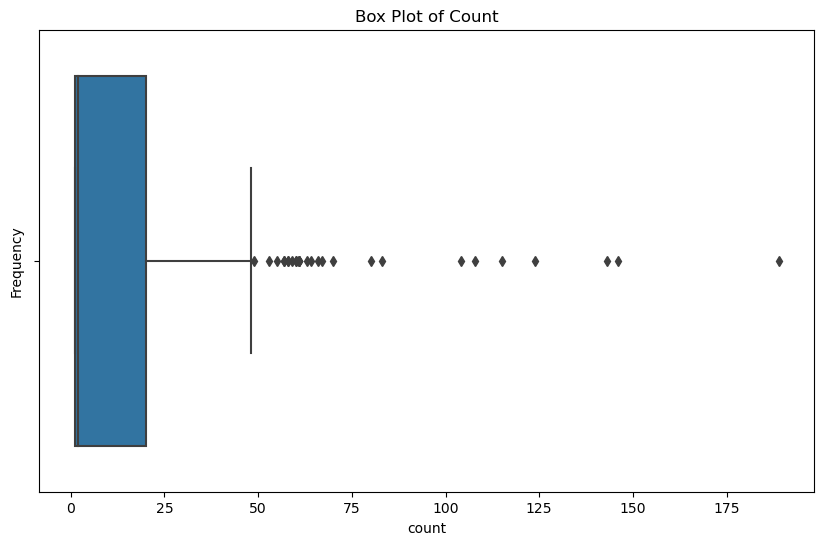

In [440]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gambar diagram box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='JumlahPenumpanghalte', data=halte_result)

# Atur label dan judul diagram
plt.xlabel('count')
plt.ylabel('Frequency')
plt.title('Box Plot of Count')

# Tampilkan diagram box plot
plt.show()


In [441]:
halte_result.head(5)
#halte_result.to_csv('halte_result_back.csv', index=False)

,tapInStops,tapInStopsName,JumlahPenumpanghalte,tapInStopsName_halte_direction_1,tapInStopsLat,tapInStopsLon
0,P00170,Penjaringan,189,Penjaringan,-6.126,106.792
1,P00016,BKN,146,BKN,-6.258,106.870
2,P00297,BNN LRT,143,BNN LRT,-6.246,106.871
3,P00164,Pejaten,124,Pejaten,-6.278,106.830
4,P00254,Tendean,115,Tendean,-6.240,106.831


pada data halte dengan code direction 1 terlihat halte penjaringan menjadi halte terpadat dengan jumlah penumpang 189 penumpang lalu halte BKN 146,BNNLRT 143 penumpang.

In [442]:
# Hitung rata-rata dan deviasi standar
mean_value = halte_result['JumlahPenumpanghalte'].mean()
std_dev = halte_result['JumlahPenumpanghalte'].std()

# Hitung Z-Score untuk setiap nilai
halte_result['Z_Score'] = (halte_result['JumlahPenumpanghalte'] - mean_value) / std_dev

# Tampilkan DataFrame dengan Z-Score
halte_result.describe()


,JumlahPenumpanghalte,tapInStopsLat,tapInStopsLon,Z_Score
count,1903.000,1903.000,1903.000,1903.000
mean,9.971,-6.215,106.845,-0.000
std,14.410,0.061,0.061,1.000
min,1.000,-6.395,106.615,-0.623
25%,1.000,-6.250,106.805,-0.623
50%,2.000,-6.213,106.843,-0.553
75%,20.000,-6.173,106.887,0.696
max,189.000,-6.093,107.024,12.424


Pada uji z score nilai yang dibawah mean adalah nilai yang di identifikasikan sebagai outlier, dan pada masalah outlier ini kitaa akan mengganti nilai outlier dengan pendekatan mean.

In [443]:
halte_result['JumlahPenumpanghalte'] = halte_result['JumlahPenumpanghalte'].replace(range(1,9),10)
halte_result.tail(5)

,tapInStops,tapInStopsName,JumlahPenumpanghalte,tapInStopsName_halte_direction_1,tapInStopsLat,tapInStopsLon,Z_Score
1898,B04633P,Sekolah Islam PB Soedirman,10,Sekolah Islam PB Soedirman,-6.314,106.863,-0.623
1899,B04641P,Sekolah Muhammadiyah Grogol,10,Sekolah Muhammadiyah Grogol,-6.163,106.793,-0.623
1900,B04647P,Sekolah Penabur Gunung Sahari,10,Sekolah Penabur Gunung Sahari,-6.170,106.840,-0.623
1901,B04672P,Semar,10,Semar,-6.311,106.805,-0.623
1902,Yayasan Adi Luhur Gedong,Yayasan Adi Luhur Gedong,10,Yayasan Adi Luhur Gedong,-6.293,106.856,-0.623


Data outlier telah diganti dengan data mean 

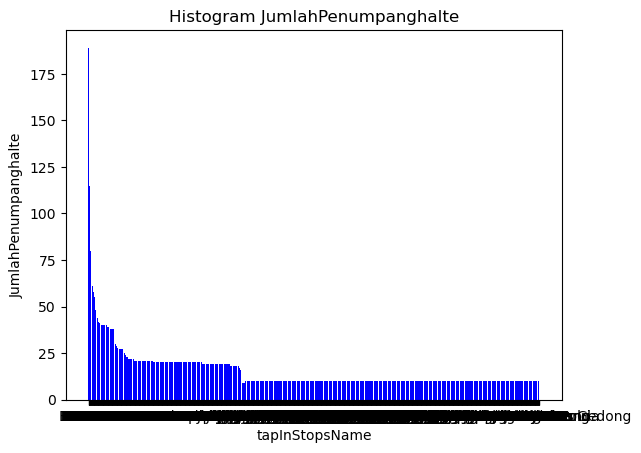

In [444]:
plt.bar(halte_result['tapInStops'],halte_result['JumlahPenumpanghalte'], color='blue')
plt.xlabel('tapInStopsName')
plt.ylabel('JumlahPenumpanghalte')
plt.title('Histogram JumlahPenumpanghalte')
plt.show()

In [445]:
jumlah_penumpang_1 = halte_result['JumlahPenumpanghalte']

In [446]:
# Anderson-Darling Tes
anderson_statistic, anderson_critical_values, anderson_significance_level = anderson(jumlah_penumpang_1, dist='norm')

# Tampilkan hasil
print(f"Anderson Statistic: {anderson_statistic}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Level: {anderson_significance_level}")

# Keputusan
alpha = 0.05
if anderson_statistic > anderson_critical_values[2]:
    print("Tolak hipotesis nol: Data tidak berasal dari distribusi normal.")
else:
    print("Terima hipotesis nol: Data berasal dari distribusi normal.")


Anderson Statistic: 289.1567284743596
Critical Values: [0.575 0.655 0.785 0.916 1.09 ]
Significance Level: [15.  10.   5.   2.5  1. ]
Tolak hipotesis nol: Data tidak berasal dari distribusi normal.


dari diagram histogram kembali terlihat data bersifat skew kiri yang berarti data tidak terdistribusi secara tidak normal dan juga pada pengujian anderson darlin test terjadi penolakan H0 yang berarti data tidak terdistribusi normal, denngan persebaran yang seperti ini bisa kita simpulkan konsentrasi penumpang terkonsentrasi pada satu tempat tertentu saja. 

In [447]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_0 = folium.Map(location=[halte_direction_1['tapInStopsLat'].iloc[0], halte_direction_1['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result['JumlahPenumpanghalte'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte'] / max_count
    
    # Jika jumlah penumpang lebih besar dari 40, tambahkan marker
    if row['JumlahPenumpanghalte'] > 50:
        # Menghitung warna berdasarkan tingkat kepadatan
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
        # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapInStopsLat'], row['tapInStopsLon']],
            radius=7,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapInStopsName_halte_direction_1']}\nJumlah Penumpang: {row['JumlahPenumpanghalte']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap_0)

# Menampilkan peta
mymap_0


Pada persebaran diagram maps ini halt dengan arah kode 1 atau Back, terlihat masih kembali titik tengan dan selatan jakarta masih menjadi titidk terpadata, pada diagram ini warna paling terang adalah titik yang mempunyai jumlah penumoang tertinggi, lalu pada diagram ini kita set titik yang mempunyai jumlah penumpang diatas 60 penumpang, dan titidk untuk kode arah 1 atau back titik di utara jakarta yang bernama halte pnejaringan menjadi titik yang mempunyai jumlah penumpang tertinggi lalu disusul oelh bagain selatan jakarta yaitu pada halte BKN.pada semua analisis kembali titik tengah jakarta menjadi titik tertinggi dalam persebaran penumpang tranjakarta dengan data analisis ini akan jadi parameter pertimbangan untuk dapat membuat suatu sulusi yang tepat dan akurat.





Pada diagram box plot ini terlihat box plot mempunya buntut sangat panjang ini berarti bahwa data memiliki outlier yang banyak dan data juga bersifat tidak terdistribusi normal, hal ini memperlihatkan bahwa data persebaran penumpang transjakarta terkonsentrasi hanya pada tempat tempat tertentu.

# Pada analisis yang pertama kita menganalisis sebaran penumpang transjakarta di setiap halte Tap Out dengan kode direction 1 atau direction Back .

In [448]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [449]:
tap_out = df1[df1['direction']==1.000][['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon']]
tap_out.drop_duplicates().head(5)

,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon
0,P00253,Tegalan,-6.203,106.857
7,B00899P,Jln. Baros,-6.311,106.784
8,B01853P,Kayuringin 2,-6.246,106.992
10,B02387P,Matraman 4,-6.200,106.855
11,P00129,Mampang Prapatan,-6.243,106.826


In [450]:
tap_out_0 = df1[df1['direction']==1.000][['tapOutStops','tapOutStopsName']]
tap_out_0_value = tap_out_0.value_counts()
tapout_0 = tap_out_0_value.reset_index().rename(columns={'count': 'JumlahPenumpanghalte_out'}) 
tapout_0.head(5) 


,tapOutStops,tapOutStopsName,JumlahPenumpanghalte_out
0,P00179,Pinang Ranti,140
1,B01745P,Jembatan Item,127
2,B00248P,Cibubur Junction,124
3,B03277P,Rusun Kapuk Muara,111
4,P00198,Puri Beta 2,111


In [453]:
tapout_0['JumlahPenumpanghalte_out'] = tapout_0['JumlahPenumpanghalte_out']
tapout_0

,tapOutStops,tapOutStopsName,JumlahPenumpanghalte_out
0,P00179,Pinang Ranti,140
1,B01745P,Jembatan Item,127
2,B00248P,Cibubur Junction,124
3,B03277P,Rusun Kapuk Muara,111
4,P00198,Puri Beta 2,111
...,...,...,...
2424,B03152P,Bundaran Senayan 1,1
2425,B03152P,Bulak Kapal 2,1
2426,B03148P,Jln. Jeruk Manis,1
2427,B03141P,RS Harum,1


In [454]:
halte_result_out_0 = tapout_0.join(tap_out.set_index('tapOutStops'), 
                             on='tapOutStops', rsuffix='_tap_out').drop_duplicates()
halte_result_out_0.drop_duplicates(subset = 'tapOutStopsName',inplace = True)
halte_result_out_0
#halte_result_out_0.to_csv('halte_tapout_result_back.csv', index=False)

,tapOutStops,tapOutStopsName,JumlahPenumpanghalte_out,tapOutStopsName_tap_out,tapOutStopsLat,tapOutStopsLon
0,P00179,Pinang Ranti,140,Pinang Ranti,-6.291,106.886
1,B01745P,Jembatan Item,127,Jembatan Item,-6.130,106.855
2,B00248P,Cibubur Junction,124,Cibubur Junction,-6.369,106.894
3,B03277P,Rusun Kapuk Muara,111,Rusun Kapuk Muara,-6.136,106.763
4,P00198,Puri Beta 2,111,Puri Beta 2,-6.231,106.724
...,...,...,...,...,...,...
2408,B03209P,RSUD Ciracas,1,RSUD Ciracas,-6.346,106.874
2409,B03207P,RSUD Cengkareng,1,RSUD Cengkareng,-6.142,106.734
2410,B03202P,RSU Andhika,1,RSU Andhika,-6.345,106.814
2419,B03190P,RSIA Brawijaya Jln. H. Jian,1,RSIA Brawijaya Jln. H. Jian,-6.257,106.807


In [455]:
# Hitung rata-rata dan deviasi standar
mean_value = halte_result_out_0['JumlahPenumpanghalte_out'].mean()
std_dev = halte_result_out_0['JumlahPenumpanghalte_out'].std()

# Hitung Z-Score untuk setiap nilai
halte_result_out_0['Z_Score'] = (halte_result_out_0['JumlahPenumpanghalte_out'] - mean_value) / std_dev

# Tampilkan DataFrame dengan Z-Score
halte_result_out_0


,tapOutStops,tapOutStopsName,JumlahPenumpanghalte_out,tapOutStopsName_tap_out,tapOutStopsLat,tapOutStopsLon,Z_Score
0,P00179,Pinang Ranti,140,Pinang Ranti,-6.291,106.886,7.786
1,B01745P,Jembatan Item,127,Jembatan Item,-6.130,106.855,6.993
2,B00248P,Cibubur Junction,124,Cibubur Junction,-6.369,106.894,6.810
3,B03277P,Rusun Kapuk Muara,111,Rusun Kapuk Muara,-6.136,106.763,6.017
4,P00198,Puri Beta 2,111,Puri Beta 2,-6.231,106.724,6.017
...,...,...,...,...,...,...,...
2408,B03209P,RSUD Ciracas,1,RSUD Ciracas,-6.346,106.874,-0.695
2409,B03207P,RSUD Cengkareng,1,RSUD Cengkareng,-6.142,106.734,-0.695
2410,B03202P,RSU Andhika,1,RSU Andhika,-6.345,106.814,-0.695
2419,B03190P,RSIA Brawijaya Jln. H. Jian,1,RSIA Brawijaya Jln. H. Jian,-6.257,106.807,-0.695


untuk menguji data terdapat outlier atau tidak maka kita dapat melakukan uji z score, dimana uji z score ini akan mengidentifikasikan data yang dibawah mean akan teridentifikasi sebagai outlier. dan diatas data telah dilakukan uji z score jika z score bernilai negatif maka data itu adalah outlier.

In [456]:
halte_result_out_0.describe()

,JumlahPenumpanghalte_out,tapOutStopsLat,tapOutStopsLon,Z_Score
count,1452.000,1452.000,1452.000,1452.000
mean,12.393,-6.215,106.845,0.000
std,16.389,0.062,0.067,1.000
min,1.000,-6.395,106.615,-0.695
25%,1.000,-6.252,106.801,-0.695
50%,3.000,-6.214,106.850,-0.573
75%,20.000,-6.172,106.892,0.464
max,140.000,-6.092,107.024,7.786


In [457]:
halte_result_out_0['JumlahPenumpanghalte_out'] = halte_result_out_0['JumlahPenumpanghalte_out'].replace(range(1,12),12)
halte_result_out_0.tail(5)

,tapOutStops,tapOutStopsName,JumlahPenumpanghalte_out,tapOutStopsName_tap_out,tapOutStopsLat,tapOutStopsLon,Z_Score
2408,B03209P,RSUD Ciracas,12,RSUD Ciracas,-6.346,106.874,-0.695
2409,B03207P,RSUD Cengkareng,12,RSUD Cengkareng,-6.142,106.734,-0.695
2410,B03202P,RSU Andhika,12,RSU Andhika,-6.345,106.814,-0.695
2419,B03190P,RSIA Brawijaya Jln. H. Jian,12,RSIA Brawijaya Jln. H. Jian,-6.257,106.807,-0.695
2427,B03141P,RS Harum,12,RS Harum,-6.248,106.910,-0.695


Lalu selanjutnya data yang teridentifikasi outlier kita ganti dengan pendekatan mean dengan acuan dari pengujian Z score 

In [458]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_out_0 = folium.Map(location=[tap_out['tapOutStopsLat'].iloc[0], tap_out['tapOutStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result_out_0['JumlahPenumpanghalte_out'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result_out_0.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte_out'] / max_count
    
    # Jika jumlah penumpang lebih besar dari 40, tambahkan marker
    if row['JumlahPenumpanghalte_out'] > 60:
        # Menghitung warna berdasarkan tingkat kepadatan
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
        # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
            radius=7,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapOutStopsName_tap_out']}\nJumlah Penumpang: {row['JumlahPenumpanghalte_out']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap_out_0)

# Menampilkan peta
mymap_out_0


Pada persebaran dengan kode arah 1 atau back, dari Tap out, penumpang transjakrta banyak sekali melakukan pemberhentian terakhir mereka di daerah teluar jakarta dan daerah tengah jakarta cenderung tidak dipadatti penumpang transjakarta dari kode arah 1 atau back dan dengan tujuan pemberhentian atau tapOut. pada diagram dan analisis ini halte pinang ranti dan jembatan item menjadi pemberhentian akhir penumpang halte terpadat dan halte pinang ranti di selatan dan halte jembatan hitam di utara. dengan peta persebaran seperti ini banyak sekali penumpang transjakarta yang tinggai di pinggir kota jakarta dan untuk wilayah mereka berkerja berada di tengah jakarta dan selatan jakarta 

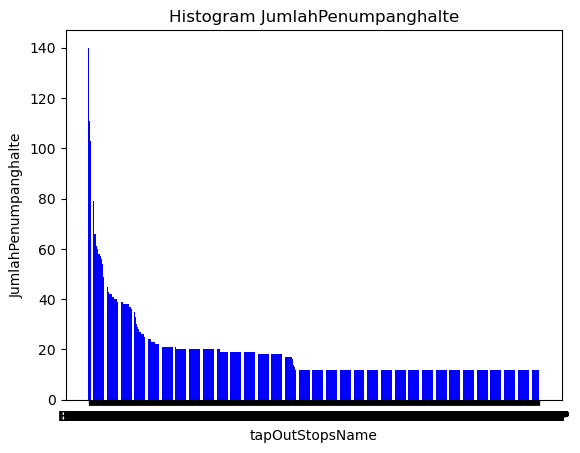

In [459]:
plt.bar(halte_result_out_0['tapOutStops'],halte_result_out_0['JumlahPenumpanghalte_out'], color='blue')
plt.xlabel('tapOutStopsName')
plt.ylabel('JumlahPenumpanghalte')
plt.title('Histogram JumlahPenumpanghalte')
plt.show()

# Pada analisis yang pertama kita menganalisis sebaran penumpang transjakarta di setiap corridor dengan kode direction 0 atau direction GO.

In [460]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [472]:
corridor_value_direction_0 = df1[df1['direction']==0.000][['corridorName']]
cor_0 = corridor_value_direction_0.value_counts()
cor_0

corridorName                       
Cibubur - Balai Kota                   194
Ciputat - CSW                          190
Pulo Gadung - Monas                    176
Kalideres - Bundaran HI via Veteran    168
Kampung Rambutan - Pondok Gede         166
                                      ... 
SMU 79                                 1  
Jln. Tebet Timur Dalam III             1  
SMPN 252                               1  
SMPN 190                               1  
Yon Arhanud - 10 Pesanggrahan          1  
Name: count, Length: 742, dtype: int64

In [473]:
result_0 = corridor_value_direction_0.value_counts().reset_index(name='count')
x_cor_0 = result_0.rename(columns={'count': 'JumlahPenumpangcorridor'})
x_cor_0.tail(5)


,corridorName,JumlahPenumpangcorridor
737,SMU 79,1
738,Jln. Tebet Timur Dalam III,1
739,SMPN 252,1
740,SMPN 190,1
741,Yon Arhanud - 10 Pesanggrahan,1


Pada data ini didapat corridor Cibubur-Balai Kota menjadi titik corridor yang terpadat dengan jumlah penumpang 197 orang dan dilanjutkan dengan corridor - CSW berjumlah 193,Harmoni-Jakarta Internasional Stadium berjumah 174.

In [474]:
# Hitung rata-rata dan deviasi standar
mean_value = x_cor_0['JumlahPenumpangcorridor'].mean()
std_dev = x_cor_0['JumlahPenumpangcorridor'].std()

# Hitung Z-Score untuk setiap nilai
x_cor_0['Z_Score'] = (x_cor_0['JumlahPenumpangcorridor'] - mean_value) / std_dev

# Tampilkan DataFrame dengan Z-Score
x_cor_0


,corridorName,JumlahPenumpangcorridor,Z_Score
0,Cibubur - Balai Kota,194,4.030
1,Ciputat - CSW,190,3.934
2,Pulo Gadung - Monas,176,3.599
3,Kalideres - Bundaran HI via Veteran,168,3.408
4,Kampung Rambutan - Pondok Gede,166,3.360
...,...,...,...
737,SMU 79,1,-0.586
738,Jln. Tebet Timur Dalam III,1,-0.586
739,SMPN 252,1,-0.586
740,SMPN 190,1,-0.586


untuk menguji data terdapat outlier atau tidak maka kita dapat melakukan uji z score, dimana uji z score ini akan mengidentifikasikan data yang dibawah mean akan teridentifikasi sebagai outlier. dan diatas data telah dilakukan uji z score jika z score bernilai negatif maka data itu adalah outlier.

In [475]:
x_cor_0.describe()

,JumlahPenumpangcorridor,Z_Score
count,742.000,742.000
mean,25.507,-0.000
std,41.814,1.000
min,1.000,-0.586
25%,1.000,-0.586
50%,2.000,-0.562
75%,43.000,0.418
max,194.000,4.030


In [476]:
x_cor_0['JumlahPenumpangcorridor'] = x_cor_0['JumlahPenumpangcorridor'].replace(range(1,19),19)
x_cor_0.tail(10)

,corridorName,JumlahPenumpangcorridor,Z_Score
732,Sbr. Gereja Kristen Jawa,19,-0.586
733,Jln. Serdang,19,-0.586
734,SMKN 56,19,-0.586
735,Sawah Besar Arah Utara,19,-0.586
736,Jln. Summagung II Barat,19,-0.586
737,SMU 79,19,-0.586
738,Jln. Tebet Timur Dalam III,19,-0.586
739,SMPN 252,19,-0.586
740,SMPN 190,19,-0.586
741,Yon Arhanud - 10 Pesanggrahan,19,-0.586


Lalu selanjutnya data yang teridentifikasi outlier kita ganti dengan pendekatan mean dengan acuan dari pengujian Z score 

In [477]:
jumlah_corridor_0 = x_cor_0['JumlahPenumpangcorridor']

In [478]:
# Anderson-Darling Tes
anderson_statistic, anderson_critical_values, anderson_significance_level = anderson(jumlah_corridor_0, dist='norm')

# Tampilkan hasil
print(f"Anderson Statistic: {anderson_statistic}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Level: {anderson_significance_level}")

# Keputusan
alpha = 0.05
if anderson_statistic > anderson_critical_values[2]:
    print("Tolak hipotesis nol: Data tidak berasal dari distribusi normal.")
else:
    print("Terima hipotesis nol: Data berasal dari distribusi normal.")


Anderson Statistic: 133.81084042563316
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Level: [15.  10.   5.   2.5  1. ]
Tolak hipotesis nol: Data tidak berasal dari distribusi normal.


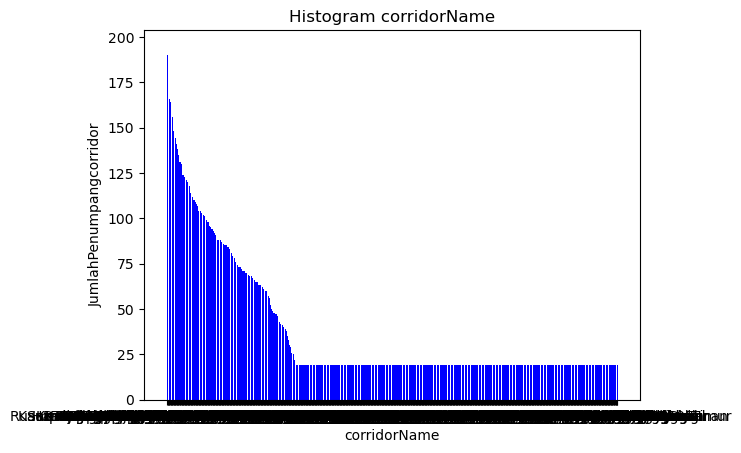

In [479]:
plt.bar(x_cor_0['corridorName'],x_cor_0['JumlahPenumpangcorridor'], color='blue')
plt.xlabel('corridorName')
plt.ylabel('JumlahPenumpangcorridor')
plt.title('Histogram corridorName')
plt.show()

Pada histogram ini menjelasakan persebaran jumlah penumpang transjakarta berdasarkan corridor dari code direction dengan kode 0 atau GO, dari diagram tersebut terlihat histogram terlihat skew kiri yang berarti terlihat persebaran penumpang pada corridor memungkinkan tidak terdistribusi normal berdasarkan data pada histogram, ketidak merataan persebaran ini bisa menyebabkan kepadatan pada titik tertentu saja.

# Pada analisis yang pertama kita menganalisis sebaran penumpang transjakarta di setiap corridor dengan kode direction 1 atau direction Back.

pada analisis ini kita akan menganalisis corridor di transjakarta dari kode arah direction 1 

In [468]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [469]:
corridor_1 = df1[df1['direction']==1.000][['corridorName','corridorID','tapInStopsLat','tapInStopsLon']]
corridor_1.drop_duplicates().head(5)

,corridorName,corridorID,tapInStopsLat,tapInStopsLon
0,Matraman Baru - Ancol,5,-6.185,106.844
7,SDN Pondok Labu 11,SDN Pondok Labu 11,-6.313,106.802
8,Bekasi Barat - Kuningan,B14,-6.210,106.831
10,Kampung Melayu - Tanah Abang via Cikini,5M,-6.199,106.842
11,BKN - Blok M,M7B,-6.240,106.831


In [470]:
corridor_value_direction_1 = df1[df1['direction']==1.000][['corridorName']]
cor_1 = corridor_value_direction_1.value_counts()
cor_1

corridorName                           
Cibubur - Balai Kota                       197
Ciputat - CSW                              193
Harmoni - Jakarta International Stadium    174
Kebayoran Lama - Tanah Abang               168
Pulo Gadung - Monas                        167
                                          ... 
Manggarai 1                                1  
Mangga Besar Arah Utara                    1  
Malaka Jaya RW11 Rorotan                   1  
MI Al Ihsan Batu Ampar                     1  
Yayasan Al Kholidin                        1  
Name: count, Length: 770, dtype: int64

In [471]:
result_1 = corridor_value_direction_1.value_counts().reset_index(name='count')
x_cor_1 = result_1.rename(columns={'count': 'JumlahPenumpangcorridor'})
x_cor_1.drop_duplicates(subset=['corridorName'], inplace=True)
x_cor_1.head(5)


,corridorName,JumlahPenumpangcorridor
0,Cibubur - Balai Kota,197
1,Ciputat - CSW,193
2,Harmoni - Jakarta International Stadium,174
3,Kebayoran Lama - Tanah Abang,168
4,Pulo Gadung - Monas,167


Dari data 5 besar corridor cibubur-Balai Kota menjadi corridor terpadat dan disusul ciputat-CSW dan Harmoni - jakarta Internasional 

In [374]:
# Hitung rata-rata dan deviasi standar
mean_value = x_cor_1['JumlahPenumpangcorridor'].mean()
std_dev = x_cor_1['JumlahPenumpangcorridor'].std()

# Hitung Z-Score untuk setiap nilai
x_cor_1['Z_Score'] = (x_cor_1['JumlahPenumpangcorridor'] - mean_value) / std_dev

# Tampilkan DataFrame dengan Z-Score
x_cor_1

,corridorName,JumlahPenumpangcorridor,Z_Score
0,Cibubur - Balai Kota,197,4.153
1,Ciputat - CSW,193,4.057
2,Harmoni - Jakarta International Stadium,174,3.599
3,Kebayoran Lama - Tanah Abang,168,3.455
4,Pulo Gadung - Monas,167,3.431
...,...,...,...
765,Manggarai 1,1,-0.570
766,Mangga Besar Arah Utara,1,-0.570
767,Malaka Jaya RW11 Rorotan,1,-0.570
768,MI Al Ihsan Batu Ampar,1,-0.570


untuk menguji data terdapat outlier atau tidak maka kita dapat melakukan uji z score, dimana uji z score ini akan mengidentifikasikan data yang dibawah mean akan teridentifikasi sebagai outlier. dan diatas data telah dilakukan uji z score jika z score bernilai negatif maka data itu adalah outlier.

In [375]:
x_cor_1.describe()

,JumlahPenumpangcorridor,Z_Score
count,770.000,770.000
mean,24.642,0.000
std,41.497,1.000
min,1.000,-0.570
25%,1.000,-0.570
50%,2.000,-0.546
75%,41.750,0.412
max,197.000,4.153


In [378]:
x_cor_1['JumlahPenumpangcorridor'] = x_cor_0['JumlahPenumpangcorridor'].replace(range(1,24),24)
x_cor_1.tail(10)

,corridorName,JumlahPenumpangcorridor,Z_Score
760,Masjid Jami Attaubah 2,24,-0.570
761,Masjid Jami Ar Ridho Jelambar,24,-0.570
762,Masjid Jami Al Inayah,24,-0.570
763,Masjid Jami Al Barkah 2,24,-0.570
764,Masjid Al Waqof,24,-0.570
765,Manggarai 1,24,-0.570
766,Mangga Besar Arah Utara,24,-0.570
767,Malaka Jaya RW11 Rorotan,24,-0.570
768,MI Al Ihsan Batu Ampar,24,-0.570
769,Yayasan Al Kholidin,24,-0.570


Lalu kita mengganti nilai outlier dengan pendekantan mean berdasarkan acuan dari data tes Z score

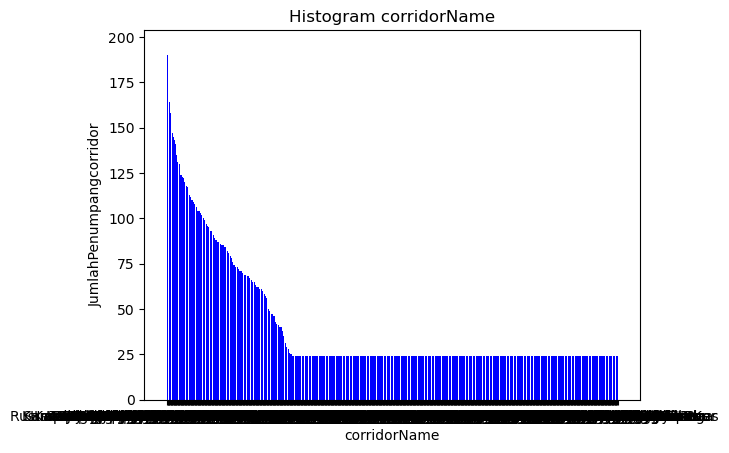

In [380]:
plt.bar(x_cor_1['corridorName'],x_cor_1['JumlahPenumpangcorridor'], color='blue')
plt.xlabel('corridorName')
plt.ylabel('JumlahPenumpangcorridor')
plt.title('Histogram corridorName')
plt.show()

# Menganalisis Persebaran Penumpang Dengan kode arah 0 atau GO Transjakarta Berdasarkan Waktu

In [91]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [92]:
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [118]:
time_0 = df1[df1['direction']==0.000][['tapInStops','tapInStopsName','direction','tapInTime']]
time_0


,tapInStops,tapInStopsName,direction,tapInTime
1,B01963P,Kemenkes 2,0.000,2023-04-03 05:42:44
2,B00499P,Gg. Kunir II,0.000,2023-04-03 05:59:06
3,B05587P,Taman Elok 1,0.000,2023-04-03 05:44:51
4,P00239,Sunter Boulevard Barat,0.000,2023-04-03 06:17:35
5,B00127P,Benhil 3,0.000,2023-04-03 05:08:01
...,...,...,...,...
37889,B01450P,Jln. Pancoran Timur III,0.000,2023-04-30 07:22:58
37890,B00018P,AKR Tower,0.000,2023-04-30 14:45:49
37893,B02485P,MTsN 37,0.000,2023-04-19 08:16:10
37894,B04489P,Sbr. SMPN 252,0.000,2023-04-14 11:36:12


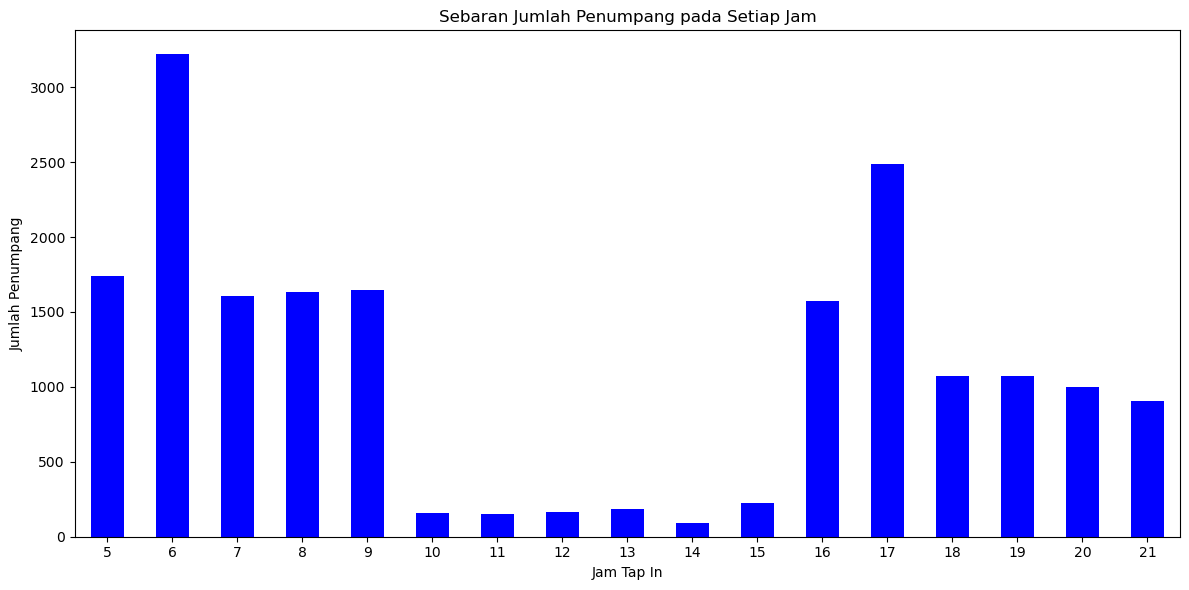

In [94]:
df1['tapInTime'] = pd.to_datetime(df1['tapInTime']) 

# Filter data untuk arah perjalanan tertentu (direction = 0.000)
time_0 = df1[df1['direction'] == 0.000][['tapInStops', 'tapInStopsName', 'direction', 'tapInTime']]

# Menghitung jumlah penumpang setiap jam
hourly_passenger_count = time_0.groupby(time_0['tapInTime'].dt.hour).size()

# Membuat histogram
plt.figure(figsize=(12, 6))
hourly_passenger_count.plot(kind='bar', color='blue')
plt.xlabel('Jam Tap In')
plt.ylabel('Jumlah Penumpang')
plt.title('Sebaran Jumlah Penumpang pada Setiap Jam')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [95]:
time_count_0 = hourly_passenger_count.reset_index(name='Timecount')
time_count_0.head(5)

,tapInTime,Timecount
0,5,1740
1,6,3219
2,7,1608
3,8,1631
4,9,1644


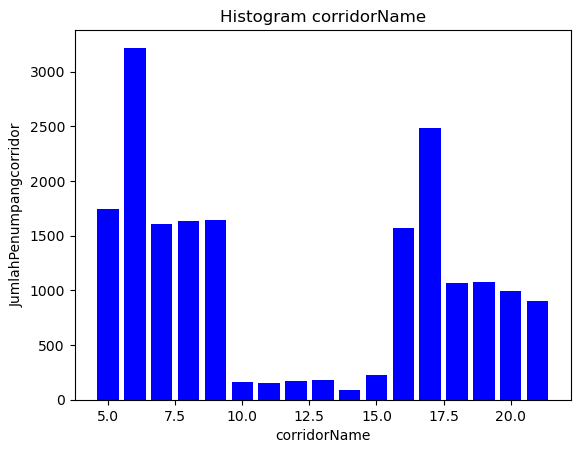

In [96]:
plt.bar(time_count_0['tapInTime'],time_count_0['Timecount'], color='blue')
plt.xlabel('corridorName')
plt.ylabel('JumlahPenumpangcorridor')
plt.title('Histogram corridorName')
plt.show()

In [97]:
jumlah_time_0 = time_count_0['Timecount']

In [98]:
# Anderson-Darling Tes
anderson_statistic, anderson_critical_values, anderson_significance_level = anderson(jumlah_time_0, dist='norm')

# Tampilkan hasil
print(f"Anderson Statistic: {anderson_statistic}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Level: {anderson_significance_level}")

# Keputusan
alpha = 0.05
if anderson_statistic > anderson_critical_values[2]:
    print("Tolak hipotesis nol: Data tidak berasal dari distribusi normal.")
else:
    print("Terima hipotesis nol: Data berasal dari distribusi normal.")


Anderson Statistic: 0.6438242630907176
Critical Values: [0.501 0.571 0.685 0.799 0.951]
Significance Level: [15.  10.   5.   2.5  1. ]
Terima hipotesis nol: Data berasal dari distribusi normal.


Pada indikator diagram diatas dan dari pengujian anderson darlin test dapa disimpulkan persebaran penumpang transjakarta dengan kode arah 0 atau GO menunjukan data terdistribusi secara normal namun tingkat kepadatan penumpang pada puku 05:00 - 09:00 dan tingkat kepadatan tertinggi terjadi di pukul 16:00 dengan berjumlah diatas 3000 penumpang, lalu terjadi penurunan signifikan penumpang transjakarta yang terjadi pada pukul 10:00 - 15:00 penurunan ini sangat drastis dimana jumlah penumpang transjakarta menjadi dibawah 500 orang saja dan jumlah penumpang transjakarta kembali mengalami kenaikan di pukul 16:00 - 21:00 dan pukul 17:00 menjadi jam terpadat setelah pukul 06:00. dengan mengetahui ttingkat kepadatan penumoang di setiap jam nyan,ini diharapakan bisa menjadi data untuk Transjakarta aga bisa melakukan berbagai strategi untuk menanggulagi tingkat kepadatan di setiap jamnya.

In [99]:
time_1 = time_0.value_counts()
time_1

tapInStops                     tapInStopsName                 direction  tapInTime          
B05078P                        Simpang Pitungan               0.000      2023-04-27 07:26:28    2
Adam Malik                     Adam Malik                     0.000      2023-04-29 14:09:47    1
B06183P                        Jln. Anggrek Raya              0.000      2023-04-29 17:36:16    1
B06188P                        SMK Nurul Huda                 0.000      2023-04-03 16:44:34    1
B06184P                        Gg. H Sayuti I                 0.000      2023-04-19 18:05:44    1
                                                                                               ..
B02775P                        Pertigaan H. Sadjim 3          0.000      2023-04-07 19:11:39    1
                                                                         2023-04-06 20:49:35    1
                                                                         2023-04-05 20:56:05    1
                         

# Menganalisis Persebaran Penumpang Dengan kode arah 1 atau BACK Transjakarta Berdasarkan Waktu

In [100]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [101]:
df1.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.000,P00142,...,106.844,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203,106.857,12.000,2023-04-03 06:00:53,3500.000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000,B01963P,...,106.833,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217,106.819,21.000,2023-04-03 06:40:01,3500.000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.000,B00499P,...,106.814,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.134,106.815,39.000,2023-04-03 06:50:55,3500.000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000,B05587P,...,106.935,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183,106.932,29.000,2023-04-03 06:28:16,3500.000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.000,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135,106.811,15.000,2023-04-03 06:57:03,3500.000


In [120]:
time_1 = df1[df1['direction']==1.000][['tapInStops','tapInStopsName','direction','tapInTime']]
time_1


,tapInStops,tapInStopsName,direction,tapInTime
0,P00142,Pal Putih,1.000,2023-04-03 05:21:44
7,B03416P,SDN Pondok Labu 11,1.000,2023-04-03 06:44:24
8,B00795P,Imperium,1.000,2023-04-03 06:01:44
10,B05433P,Pegangsaan Timur,1.000,2023-04-03 06:32:28
11,P00254,Tendean,1.000,2023-04-03 06:22:10
...,...,...,...,...
37892,B01087P,Jln. Gunung Galunggung 1,1.000,2023-04-28 16:38:56
37895,P00261,Tosari,1.000,2023-04-21 18:18:37
37896,P00064,Garuda Taman Mini,1.000,2023-04-18 21:52:31
37897,B02873P,Plaza Sentral,1.000,2023-04-04 10:29:47


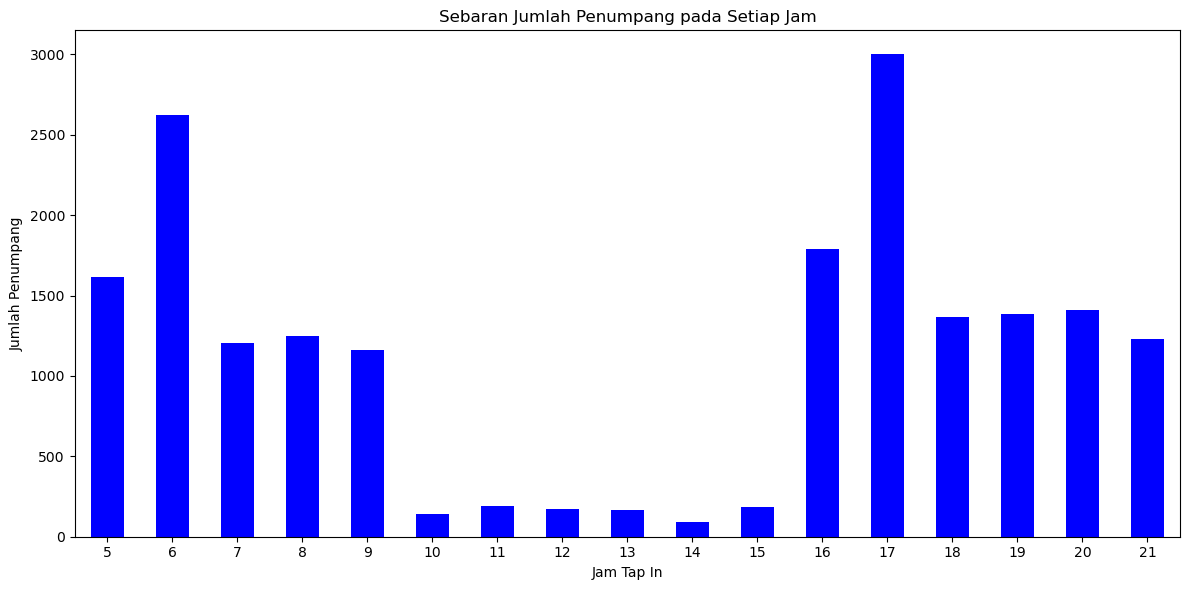

In [103]:
df1['tapInTime'] = pd.to_datetime(df1['tapInTime']) 

# Filter data untuk arah perjalanan tertentu (direction = 1.000)
time_1 = df1[df1['direction'] == 1.000][['tapInStops', 'tapInStopsName', 'direction', 'tapInTime']]

# Menghitung jumlah penumpang setiap jam
hourly_passenger_count_1 = time_1.groupby(time_1['tapInTime'].dt.hour).size()

# Membuat histogram
plt.figure(figsize=(12, 6))
hourly_passenger_count_1.plot(kind='bar', color='blue')
plt.xlabel('Jam Tap In')
plt.ylabel('Jumlah Penumpang')
plt.title('Sebaran Jumlah Penumpang pada Setiap Jam')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

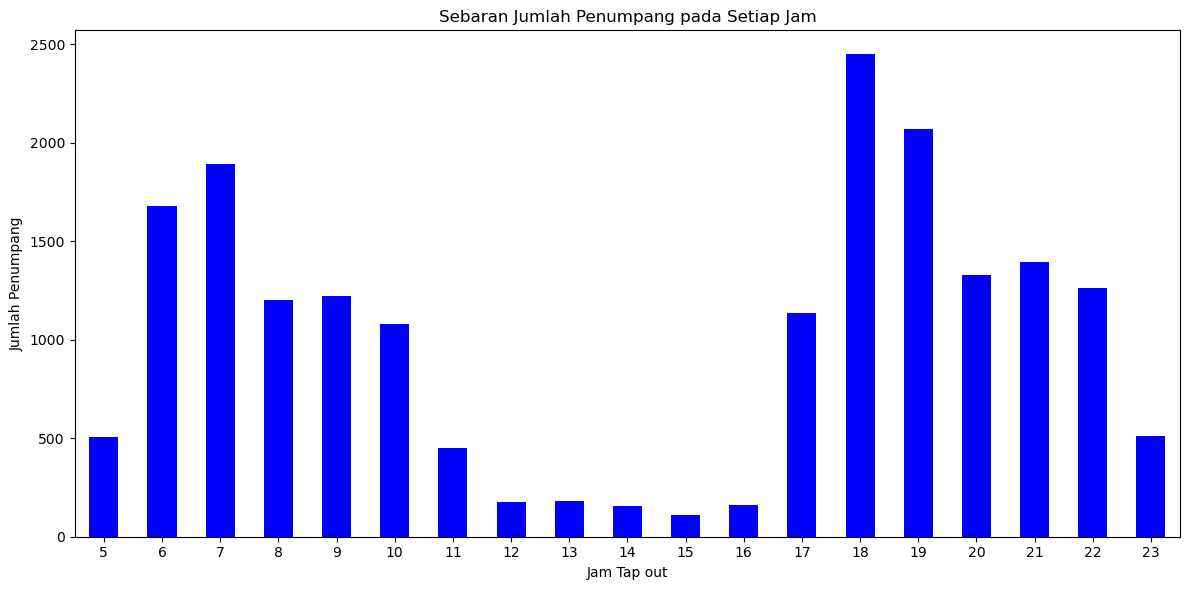

In [229]:
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime']) 

# Filter data untuk arah perjalanan tertentu (direction = 1.000)
time_1 = df1[df1['direction'] == 1.000][['tapOutStops', 'tapOutStopsName', 'direction', 'tapOutTime']]

# Menghitung jumlah penumpang setiap jam
hourly_passenger_count_1 = time_1.groupby(time_1['tapOutTime'].dt.hour).size()

# Membuat histogram
plt.figure(figsize=(12, 6))
hourly_passenger_count_1.plot(kind='bar', color='blue')
plt.xlabel('Jam Tap out')
plt.ylabel('Jumlah Penumpang')
plt.title('Sebaran Jumlah Penumpang pada Setiap Jam')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [104]:
time_count_1 = hourly_passenger_count_1.reset_index(name='Timecount')
time_count_1.head(7)

,tapInTime,Timecount
0,5,1618
1,6,2620
2,7,1204
3,8,1249
4,9,1163
5,10,141
6,11,189


In [105]:
jumlah_time_1 = time_count_1['Timecount']

In [106]:
# Anderson-Darling Tes
anderson_statistic, anderson_critical_values, anderson_significance_level = anderson(jumlah_time_1, dist='norm')

# Tampilkan hasil
print(f"Anderson Statistic: {anderson_statistic}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Level: {anderson_significance_level}")

# Keputusan
alpha = 0.05
if anderson_statistic > anderson_critical_values[2]:
    print("Tolak hipotesis nol: Data tidak berasal dari distribusi normal.")
else:
    print("Terima hipotesis nol: Data berasal dari distribusi normal.")

Anderson Statistic: 0.815761011502957
Critical Values: [0.501 0.571 0.685 0.799 0.951]
Significance Level: [15.  10.   5.   2.5  1. ]
Tolak hipotesis nol: Data tidak berasal dari distribusi normal.


Dari data-data persebaran penumpang transjakarta dengan kode arah 1 atau back, dapat disimpulkan bahwa tingkat kepadatan pada arah back terjadi pada pukul 17:00 dan terlihat sama dengan kedua arah yaitu pada data pukul 10:00 - 15:00, pada jam tersebut terjadi penurunan penumpang secara drastis yang tejadi juga pada kode ara 0 atau GO, ini menunjukan bahwa di rentang jam 10:00 - 15:00 penumpagn transjakarta sangat menurun drasti, dengan data ini transjakarta dapat mengambil keputusan yan terbaik untuk mealayani penumpang secara baik.

# Kesimpulan dan Rekomendasi 

Kesimpulan 

1. Dari analasis dari berbagai halte - halte transjakarta dan dari arah GO terlihat hanya ada 3 halte dari 1895 halte yang jumlah penumpang transjakartanya diatas 100, yaitu halte CibuburJunction,Rusun Kapuk Muara dan Garuda Taman Mini.

2. Dari ketiga halte tersebut menuruut lat dan Lon dari setiap halte, halte Rusun Kapuk muara berada di utara jakarta dan Cibubur Junction dan Garuda Taman Mini berada di selatan Jakarta 

3. Berdasarkan sebaran data diagram maps sebaran penumpang transjakarta dengan kode arah GO berada pada titi tengah jakata mengalami paling banyak kepadatan dan sebagian selatan jakarta.

4. Dari analisis halte - halte dengan kode arah 1 atau Back terdapat 7 halte dari 1903 halte yang jumlah penumpangnya diatas 100 penumpang yaitu hate,penjaringan,BKN,BNN LRT,Pejaten,Tendean,Penggilingan dan simpang danau sunter utara barat.

5. Berdasarkan diagram maps sebaran 7 halte terpadat dari kode arah 1, 2 halte berada di jakarta bagian utara yaitu halte penjaringan dan simpang danau sunter utara lalu 4 lainya berada di jakarta bagian selatan dan satu di jakarta bagian timu yaitu halte Penggilingan. dan kembali titik tengah jakarta menjadi titik dengan tinkat sebaran yang paling tinggi. 

6. Kemudian berdasarkan data corridor denga kode arah 0 atau GO cibubur - balai kota menjadi corridor terpadat dengan jumlah penumpang 194 penumpang transjakarta, lalu ciputat - CSW dengan jumlah penumpang 190 

7. Dari kode arah 1 kembali Cibubur - Balai Kota menjadi corridor dengan jumlah penumpang tertinggi yaitu 197 penumpang, kemudian juga ciputat - CSW dengan jumlah penumpang 193 penumpang.

8. Dari data sebaran penumpang pada tiap jamnya dengan kode arah 0 dapat disimpulkan pukuk 06:00 menjadi jam terpadat dengan jumlah penumpang diatas 3000 penumpang lalu pukul 05:00 - 09:00 adalah jam terpada pada kode arah 0, kemudia di pukulu 10:00 - 15:00 terjadi penurunan penumpang tranjakarta hingga dibawah 500 penumpang dna naik kempali secar signifikan pada pukuk 16:00 - 21:00.

9. kemudia pada sebaran penumpang dengan kode arah 1 atau Back, pukul 17:00 adalah pukul dengan jumlah penumpang terpadat dan tingkat kepadatan terjadi pada pukul 16:00 - 21:00 dan yang kedua pada 05:00 - 09:00, dan kembali pada pukul 10:00 - 15:00 penumpang transjakarta mengalami penurunan secara drastis hingga dibawah 500 penumpang.

10. Pada persebaran dengan kode arah 1 atau back, dari data tap out, penumpang transjakarta banyak sekali melakukan pemberhentian terakhir mereka di daetar terluat jakarta dan daerah tengah jakarta cenderung sedikit penumpang dari kode arah 1 dengan data tap out. pada analisis berdasarkan diagram maps halte pinang ranti dan jembatan item menjadi pemberhentian akhir penumpang transjkarta namun unik nya halte pinang ranti berada di salatan terluar jakarta dan halte jembatan hitam berada di utara terluar jakarta, hal ini menunjukan kemungkinan banyak pengguna transjakarta yang bekerja di jakarta pusat dan jakarta selatan bermukim di jakarta utara dan jakarta selatan lalu banyak juga yang bermukim de luar kota jakarta yang masuk untuk bekerja di kota jakarta ini terlihat dari data tapIn dan tapStop dari data transjakarta.





Rekomendasi :

1. Perbanyak armada Bus transjakarta di titik titik halte dengan jumlah terpadat agar dapat mengurai kepadatan penmpang dan penumpang tidak berdesak desakan sehingga penumpang dapat merasakan pelayanan yang terbaik.

2. perketat penjagaan di corridor - corridor dengan tingkat kepatadan tinggi agar Bus tranjakarta dapat melaju dengan cepat dan tidak ada hambatan yang signifikan, supaya di corridor tersebut dapat mengurai kepadatan penumpang transjakarta.

3. bisa mengkaji lebih dalam lagi dari segi persebaran penumpang tranjakarta yang terkonsentrasi di tegah jakarta dan sebagian selatan jakarta, untuk bisa membuat pengguna transjakarta di daerah lainnya bisa meningkat, hal ini penting untu dapat memberikan tingkat keuntungan yang didapat oleh transjakarta.

4. Pada jam 05:00 - 09:00 penumpang tranjakarta sangat tinggi terutama pada kode arah 0, dengan data ini transjakarta dapat memperbanyak aramada nya pada jam jam tersebut, lalu pada pukul 16:00 - 21:00 juga penumpang transjakarta mengalami tingkat kepdatan yang tinggu juga terutama pada kode arah 1, dan dari kedua arah pukul 14:00 - 15:00 penumpang transjakarta mengalami penurunan secara drastis. dengan data ini kita merekomendasikan untuk pukul 14:00 - 15:00 armada transjakarta untuk dapat dikurangkan secara 50% agar dapat menghemat cost yang dikeluarkan, lalu untuk pukul 05:00 - 09:00 dan 16:00 - 21:00 bisa dilakukan penambahan armada agar dapat mengurai kepadatan yang terjadi terutama pada titik tertinggi yaitu pukul 06:00 pada pada kode arah 0 dan 17:00 pada arah 1.   